<a href="https://colab.research.google.com/github/frfusch21/DTS_GGU_5/blob/Hartantya-AT/GGU5_Nia_All_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Import Data**

In [3]:
uio = pd.read_csv('/content/drive/MyDrive/Belajar/all-data_clean.csv', header=0, sep=',', encoding="Latin1")
uio.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec
0,1,Quito,2016-09-17 09:32:06,2016-09-17 10:05:51,0.632055,0.528947,-78.549447,-0.361363,N,2025,24228,346
1,2,Guadalajara Easy Taxi,2016-09-17 09:59:54,2016-09-17 10:06:23,0.327804,0.391950,-103.366600,20.686971,N,389,2962,3675
2,3,Monterrey,2016-09-17 10:06:52,2016-09-17 10:09:40,0.140910,0.563280,-100.165737,25.619387,N,168,951,0
3,4,Monterrey,2016-09-17 09:45:56,2016-09-17 10:13:34,0.207565,0.590416,-100.491721,25.676294,N,1659,11082,358
4,5,Monterrey,2016-09-17 10:12:00,2016-09-17 10:16:31,0.128881,0.580419,-100.104166,25.643862,N,272,2021,3614


In [4]:
uio.describe()

,id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec
count,90287.000000,90287.000000,90287.000000,90287.000000,90287.000000,9.028700e+04,9.028700e+04,9.028700e+04
mean,45144.000000,0.400130,0.399127,-87.114696,9.000339,3.505614e+04,1.751764e+05,9.637481e+06
std,26063.756214,0.230801,0.230811,12.752674,12.547121,8.947615e+05,2.370332e+07,4.497338e+08
min,1.000000,0.000009,0.000009,-123.341828,-53.158163,-2.207486e+08,-2.147484e+09,0.000000e+00
25%,22572.500000,0.200113,0.199008,-100.162537,-0.203951,4.930000e+02,2.278000e+03,8.800000e+01
50%,45144.000000,0.400801,0.398292,-79.023126,4.562602,9.330000e+02,4.668000e+03,2.140000e+02
75%,67715.500000,0.600672,0.599134,-78.484563,21.839787,1.924500e+03,8.872000e+03,4.840000e+02
max,90287.000000,0.799438,0.799223,174.811881,60.321647,7.696342e+07,2.147484e+09,9.516306e+10


In [5]:
uio.shape

(90287, 12)

In [6]:
uio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90287 entries, 0 to 90286
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90287 non-null  int64  
 1   vendor_id           90287 non-null  object 
 2   pickup_datetime     90287 non-null  object 
 3   dropoff_datetime    90287 non-null  object 
 4   pickup_longitude    90287 non-null  float64
 5   pickup_latitude     90287 non-null  float64
 6   dropoff_longitude   90287 non-null  float64
 7   dropoff_latitude    90287 non-null  float64
 8   store_and_fwd_flag  90287 non-null  object 
 9   trip_duration       90287 non-null  int64  
 10  dist_meters         90287 non-null  int64  
 11  wait_sec            90287 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 8.3+ MB


# **Analisis Secara Umum**

In [7]:
print(uio['vendor_id'].unique())

['Quito' 'Guadalajara Easy Taxi' 'Monterrey' 'Manta' 'Aguascalientes'
 'Guadalajara' 'Cali' 'Ecuador' 'BogotÃ¡' 'MedellÃ\xadn'
 'MÃ©xico DF Taxi de Sitio' 'MÃ©xico DF Taxi Libre' 'Default Fare'
 'PanamÃ¡ UberX' 'PanamÃ¡ UberSUV' 'Puebla Easy Taxi'
 'MÃ©xico DF Radio Taxi' 'Cuenca' 'RumiÃ±ahui' 'PanamÃ¡ Uber'
 'Guadalajara UberXL' 'MÃ©xico DF UberX' 'Uruguay' 'Ibarra'
 'Guadalajara UberX' 'MÃ©xico DF UberXL' 'BogotÃ¡ UberX' 'Monterrey UberX'
 'Ambato' 'MÃ©xico DF UberSUV' 'Lima UberX' 'Valparaiso UberX'
 'Puebla UberX' 'Bogota UberBlack' 'Machala' 'Cali UberX' 'Riobamba'
 'Santa Fe' 'Guayaquil Cabify Lite' 'St. Domingo' 'MedellÃ\xadn UberBlack'
 'Monterrey Easy Taxi' 'Pereira' 'Rosario Remis' 'Houston UberBlack'
 'Aguascalientes UberX' 'Cuenca +7km' 'Guayaquil Cabify Guayaco' 'Rosario'
 'MÃ©xico DF UberBlack' 'Pereira UberX' 'Quito Cabify Lite'
 'Rio de Janeiro' 'SÃ£o Paulo' 'Buenos Aires' 'Barranquilla UberBlack'
 'MedellÃ\xadn UberX' 'Brasilia' 'Salvador UberX' 'LeÃ³n UberX'
 'Santo D

In [8]:
print(uio['store_and_fwd_flag'].unique())

['N']


In [9]:
print(uio.groupby(['vendor_id'])['id'].count().reset_index())

                vendor_id     id
0          Aguascalientes  10326
1    Aguascalientes UberX    247
2                  Ambato    214
3             Ant Ecuador    525
4                 Armenia      1
..                    ...    ...
134          Toluca UberX      5
135               Uruguay    339
136      Valledupar UberX     11
137      Valparaiso UberX      8
138   Villavicencio UberX      2

[139 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


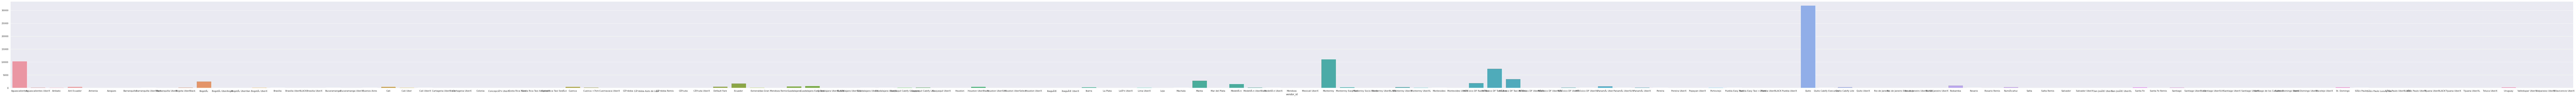

In [10]:
x = uio.groupby(['vendor_id'])['id'].count()
sns.set(rc={'figure.figsize':(230,8)})
sns.barplot(x.index, x.values)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


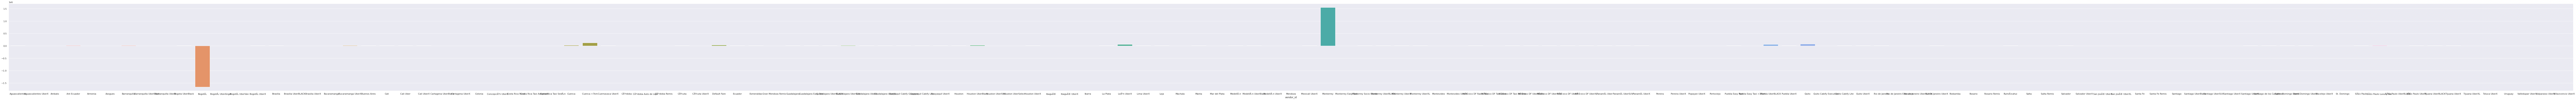

In [11]:
x = uio.groupby(['vendor_id'])['dist_meters'].mean()
sns.set(rc={'figure.figsize':(230,8)})
sns.barplot(x.index, x.values)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


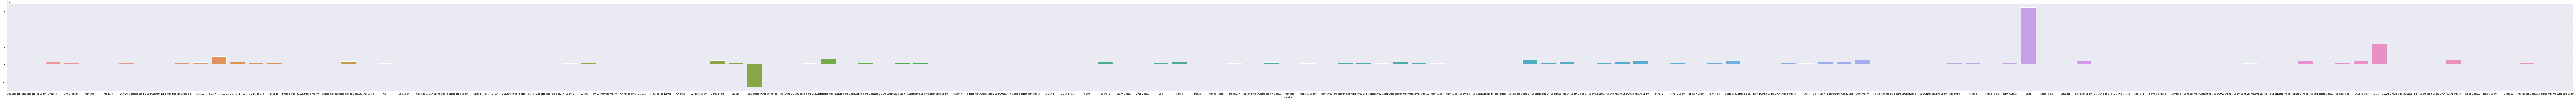

In [12]:
x = uio.groupby(['vendor_id'])['trip_duration'].mean()
sns.set(rc={'figure.figsize':(230,8)})
sns.barplot(x.index, x.values)

In [13]:
uio.isnull().values.any()

False

In [14]:
uio['pickup_datetime'] = pd.to_datetime(uio['pickup_datetime'], format='%Y/%m/%d %H:%M:%S')
uio['dropoff_datetime'] = pd.to_datetime(uio['dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')

In [15]:
print('Pickup -> Date : max = ', uio['pickup_datetime'].dt.date.max(), ' & min = ',uio['pickup_datetime'].dt.date.min(), ' || Time : Max = ', uio['pickup_datetime'].dt.time.max(), ' & min = ', uio['pickup_datetime'].dt.time.min())

print('Dropoff -> Date : max = ', uio['dropoff_datetime'].dt.date.max(), ' & min = ',uio['dropoff_datetime'].dt.date.min(), ' || Time : Max = ', uio['dropoff_datetime'].dt.time.max(), ' & min = ', uio['dropoff_datetime'].dt.time.min())

Pickup -> Date : max =  2017-08-01  & min =  2014-12-31  || Time : Max =  12:59:59  & min =  01:00:00
Dropoff -> Date : max =  2017-08-01  & min =  2009-12-31  || Time : Max =  12:59:59  & min =  01:00:01


In [16]:
correlation_matrix = uio.corr()
correlation_matrix

,id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec
id,1.000000,-0.015350,-0.019459,-0.004857,-0.001347,-0.000982,-0.002335,0.002616
pickup_longitude,-0.015350,1.000000,-0.230991,0.687053,-0.727643,0.007163,-0.006340,0.016641
pickup_latitude,-0.019459,-0.230991,1.000000,-0.107931,0.209949,0.010269,0.005829,-0.009096
dropoff_longitude,-0.004857,0.687053,-0.107931,1.000000,-0.867666,0.011230,-0.009677,0.013946
dropoff_latitude,-0.001347,-0.727643,0.209949,-0.867666,1.000000,-0.007207,0.010699,-0.015284
trip_duration,-0.000982,0.007163,0.010269,0.011230,-0.007207,1.000000,-0.000102,0.055894
dist_meters,-0.002335,-0.006340,0.005829,-0.009677,0.010699,-0.000102,1.000000,0.000035
wait_sec,0.002616,0.016641,-0.009096,0.013946,-0.015284,0.055894,0.000035,1.000000


# **Analisis Data Distance Meters**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


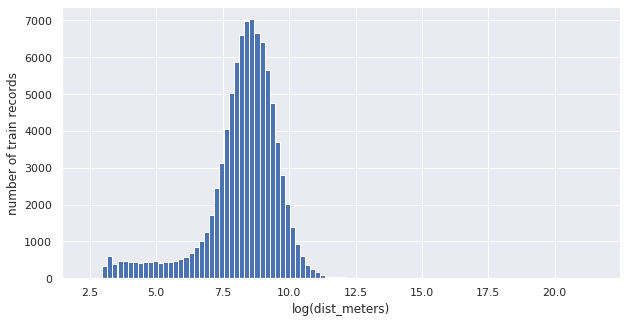

In [17]:
sns.set(rc={'figure.figsize':(10,5)})
uio['log_dist_meters'] = np.log(uio['dist_meters'].values + 1)
plt.hist(uio['log_dist_meters'].values, bins=100)
plt.xlabel('log(dist_meters)')
plt.ylabel('number of train records')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


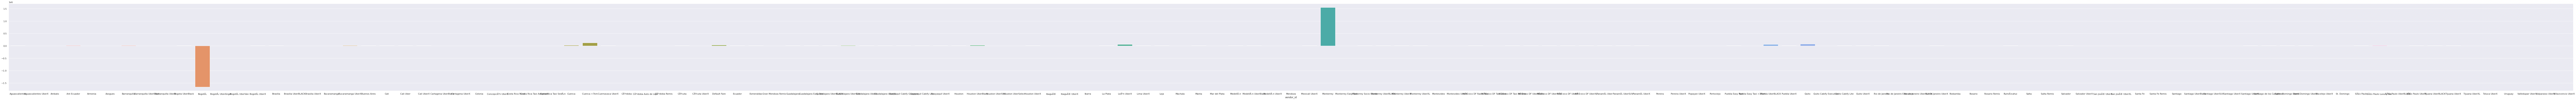

In [18]:
x = uio.groupby(['vendor_id'])['dist_meters'].mean()
sns.set(rc={'figure.figsize':(230,8)})
sns.barplot(x.index, x.values)

In [19]:
print((uio['dist_meters'].min()))
print((uio['dist_meters'].max()))

-2147483648
2147483647


In [20]:
print((uio['dist_meters'].min())/1000)
print((uio['dist_meters'].max())/1000)

-2147483.648
2147483.647


Mengubah satuan jarak dari meter menjadi kilometer

In [21]:
uio['dist_kilometers'] =  uio['dist_meters']/1000

Menghapus data jarak yang bernilai negatif

In [22]:
uio = uio[(uio['dist_kilometers'] > 0.25)]

In [23]:
print((uio['dist_kilometers'].min()))
print((uio['dist_kilometers'].max()))

0.251
2147483.647


Menghapus outlier dengan IQR Score

In [24]:
# calculate Q1 and Q3
Q1 = uio[['dist_kilometers']].quantile(0.25)
Q3 = uio[['dist_kilometers']].quantile(0.75)

# calculate the IQR
IQR = Q3 - Q1

# filter the dataset with the IQR
IQR_outliers =  uio[['dist_kilometers']][(( uio[['dist_kilometers']] < (Q1 - 1.5 * IQR)) |( uio[['dist_kilometers']] > (Q3 + 1.5 * IQR))).any(axis=1)]
min_outlier = IQR_outliers.min()
print(min_outlier[0])

19.222


In [25]:
uio = uio[(uio['dist_kilometers'] < min_outlier[0])]
uio.shape

(78611, 14)

In [26]:
print((uio['dist_kilometers'].min()))
print((uio['dist_kilometers'].max()))

0.251
19.217


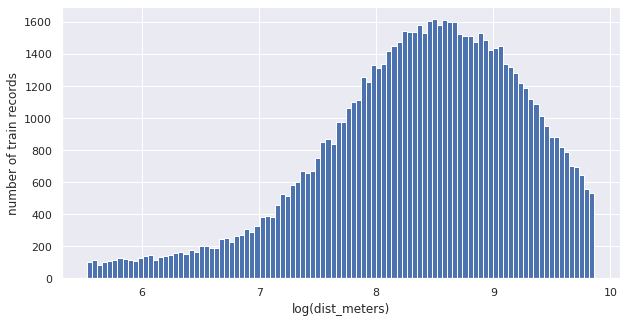

In [27]:
sns.set(rc={'figure.figsize':(10,5)})
plt.hist(uio['log_dist_meters'].values, bins=100)
plt.xlabel('log(dist_meters)')
plt.ylabel('number of train records')
plt.show()

# **Analisis Data Trip Duration**

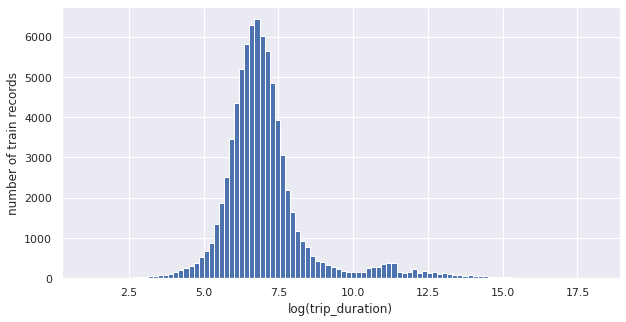

In [28]:
sns.set(rc={'figure.figsize':(10,5)})
uio['log_trip_duration'] = np.log(uio['trip_duration'].values + 1)
plt.hist(uio['log_trip_duration'].values, bins=100)
plt.xlabel('log(trip_duration)')
plt.ylabel('number of train records')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


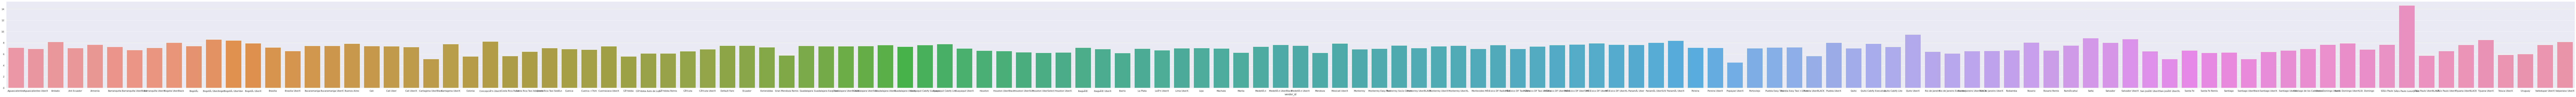

In [29]:
x = uio.groupby(['vendor_id'])['log_trip_duration'].mean()
sns.set(rc={'figure.figsize':(230,8)})
sns.barplot(x.index, x.values)

In [30]:
print((uio['trip_duration'].min()))
print((uio['trip_duration'].max()))

2
70026052


In [31]:
print((uio['trip_duration'].min())/60)
print((uio['trip_duration'].max())/60)

0.03333333333333333
1167100.8666666667


Mengubah satuan trip duration dari detik menjadi menit

In [32]:
uio['trip_duration_in_minutes'] =  uio['trip_duration']/60

Menghapus data trip duration yang bernilai negatif

In [33]:
uio = uio[(uio['trip_duration_in_minutes'] >= 0.5)]
uio.shape

(78377, 16)

In [34]:
print((uio['trip_duration_in_minutes'].min()))
print((uio['trip_duration_in_minutes'].max()))

0.5
1167100.8666666667


Menghapus outlier dengan IQR Score

In [35]:
# calculate Q1 and Q3
Q1 = uio[['trip_duration_in_minutes']].quantile(0.25)
Q3 = uio[['trip_duration_in_minutes']].quantile(0.75)

# calculate the IQR
IQR = Q3 - Q1

# filter the dataset with the IQR
IQR_outliers =  uio[['trip_duration_in_minutes']][(( uio[['trip_duration_in_minutes']] < (Q1 - 1.5 * IQR)) |( uio[['trip_duration_in_minutes']] > (Q3 + 1.5 * IQR))).any(axis=1)]
min_outlier = IQR_outliers.min()
print(min_outlier)

trip_duration_in_minutes    57.083333
dtype: float64


In [36]:
uio = uio[(uio['trip_duration_in_minutes'] < min_outlier[0])]
uio.shape

(68913, 16)

In [37]:
print((uio['trip_duration_in_minutes'].min()))
print((uio['trip_duration_in_minutes'].max()))

0.5
57.06666666666667


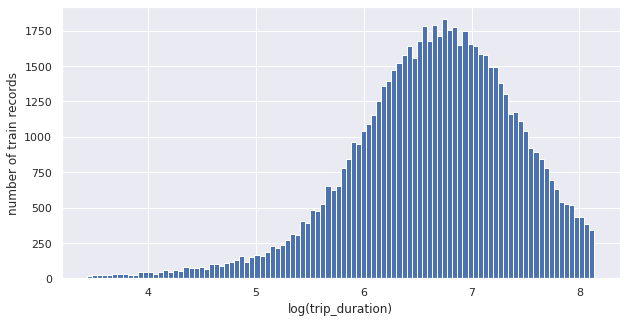

In [38]:
sns.set(rc={'figure.figsize':(10,5)})
plt.hist(uio['log_trip_duration'].values, bins=100)
plt.xlabel('log(trip_duration)')
plt.ylabel('number of train records')
plt.show()

# **Analisis Data Datetime**

In [39]:
print('Pickup -> Date : max = ', uio['pickup_datetime'].dt.date.max(), ' & min = ',uio['pickup_datetime'].dt.date.min(), ' || Time : Max = ', uio['pickup_datetime'].dt.time.max(), ' & min = ', uio['pickup_datetime'].dt.time.min())

print('Dropoff -> Date : max = ', uio['dropoff_datetime'].dt.date.max(), ' & min = ',uio['dropoff_datetime'].dt.date.min(), ' || Time : Max = ', uio['dropoff_datetime'].dt.time.max(), ' & min = ', uio['dropoff_datetime'].dt.time.min())

Pickup -> Date : max =  2017-08-01  & min =  2016-06-22  || Time : Max =  12:59:59  & min =  01:00:00
Dropoff -> Date : max =  2017-08-01  & min =  2016-06-22  || Time : Max =  12:59:59  & min =  01:00:01


In [40]:
uio['diff_datetime_minutes'] = (uio['dropoff_datetime']-uio['pickup_datetime']).dt.total_seconds()/60

In [41]:
uio[(uio['trip_duration_in_minutes'] != uio['diff_datetime_minutes'])]

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec,log_dist_meters,dist_kilometers,log_trip_duration,trip_duration_in_minutes,diff_datetime_minutes
3,4,Monterrey,2016-09-17 09:45:56,2016-09-17 10:13:34,0.207565,0.590416,-100.491721,25.676294,N,1659,11082,358,9.313168,11.082,7.414573,27.650000,27.633333
4,5,Monterrey,2016-09-17 10:12:00,2016-09-17 10:16:31,0.128881,0.580419,-100.104166,25.643862,N,272,2021,3614,7.611842,2.021,5.609472,4.533333,4.516667
8,9,Monterrey,2016-09-17 09:48:30,2016-09-17 10:33:27,0.223600,0.626796,-100.495666,25.687190,N,2698,4770,292,8.470311,4.770,7.900637,44.966667,44.950000
9,10,Guadalajara Easy Taxi,2016-09-17 10:28:23,2016-09-17 10:35:03,0.327517,0.390198,-103.359451,20.669558,N,401,2733,71,7.913521,2.733,5.996452,6.683333,6.666667
11,12,Monterrey,2016-09-17 10:33:15,2016-09-17 10:42:40,0.215668,0.616358,-100.413199,25.686818,N,566,3989,99,8.291547,3.989,6.340359,9.433333,9.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90273,90274,Monterrey UberXL,2016-10-28 12:42:01,2016-10-28 12:58:51,0.146156,0.625826,-100.255403,25.700483,N,1011,12569,240,9.439068,12.569,6.919684,16.850000,16.833333
90274,90275,Monterrey,2016-10-28 12:44:49,2016-10-28 01:02:20,0.124390,0.630560,-100.111494,25.689907,N,1052,9790,167,9.189219,9.790,6.959399,17.533333,-702.483333
90277,90278,Aguascalientes,2016-10-28 01:33:31,2016-10-28 01:44:07,0.276663,0.439326,-102.236014,21.880377,N,637,7591,141,8.934850,7.591,6.458338,10.616667,10.600000
90279,90280,Aguascalientes,2016-10-28 02:38:07,2016-10-28 02:47:53,0.299507,0.435571,-102.283521,21.832715,N,587,3661,3795,8.205765,3.661,6.376727,9.783333,9.766667


Menghapus dan mengecek data datetime yang tidak valid

In [42]:
uio[(uio['diff_datetime_minutes'] < 0)]

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec,log_dist_meters,dist_kilometers,log_trip_duration,trip_duration_in_minutes,diff_datetime_minutes
177,178,Monterrey,2016-09-19 12:34:44,2016-09-19 01:02:40,0.147126,0.641653,-100.246960,25.828563,N,1676,17843,501,9.789423,17.843,7.424762,27.933333,-692.066667
268,269,Quito,2016-09-19 12:45:43,2016-09-19 01:00:52,0.569074,0.121326,-78.498795,-0.124477,N,909,4550,356,8.423102,4.550,6.813445,15.150000,-704.850000
269,270,Monterrey,2016-09-19 12:54:12,2016-09-19 01:00:40,0.127992,0.580993,-100.086151,25.637116,N,388,3583,3637,8.184235,3.583,5.963579,6.466667,-713.533333
270,271,Monterrey,2016-09-19 12:57:45,2016-09-19 01:04:11,0.142814,0.575577,-100.153109,25.629900,N,387,3671,60,8.208492,3.671,5.961005,6.450000,-713.566667
271,272,PanamÃ¡ Uber,2016-09-19 12:48:59,2016-09-19 01:06:47,0.751566,0.004105,-79.517449,9.008469,N,1068,3866,188,8.260234,3.866,6.974479,17.800000,-702.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90048,90049,BogotÃ¡,2016-10-27 12:40:50,2016-10-27 01:04:02,0.385719,0.747575,-74.102671,4.716681,N,1392,17635,139,9.777698,17.635,7.239215,23.200000,-696.800000
90135,90136,MÃ©xico DF Taxi Libre,2016-10-27 12:49:57,2016-10-27 01:08:23,0.009819,0.253854,-99.052842,19.325263,N,1106,4251,277,8.355145,4.251,7.009409,18.433333,-701.566667
90136,90137,Quito,2016-10-27 12:54:36,2016-10-27 01:10:07,0.467672,0.083624,-78.483215,-0.142045,N,931,2964,280,7.994632,2.964,6.837333,15.516667,-704.483333
90139,90140,BogotÃ¡,2016-10-27 12:28:22,2016-10-27 01:16:58,0.371022,0.764480,-74.042396,4.708566,N,2917,10994,1401,9.305196,10.994,7.978654,48.616667,-671.400000


In [43]:
uio = uio[(uio['diff_datetime_minutes'] >= 0)]
uio.shape

(67710, 17)

# **Data Trip Duration VS Datetime**

Memecah feature pickup_datetime menjadi tahun, bulan, tanggal, jam, menit, dan hari

In [44]:
uio['pickup_month'] = uio['pickup_datetime'].dt.month
uio['pickup_year'] = uio['pickup_datetime'].dt.year
uio['pickup_day'] = uio['pickup_datetime'].dt.day
uio['pickup_hour'] = uio['pickup_datetime'].dt.hour
uio['pickup_minute'] = uio['pickup_datetime'].dt.minute
uio['pickup_day_of_week'] = uio['pickup_datetime'].dt.dayofweek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

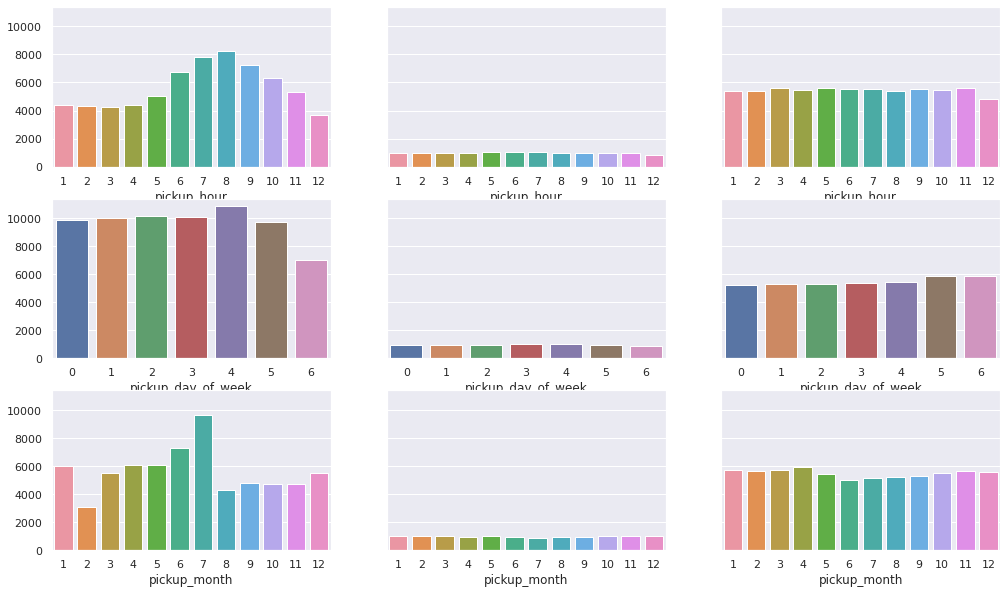

In [45]:
f, axes = plt.subplots(3,3,figsize=(17,10), sharey=True)

dat = uio.groupby(['pickup_hour'])['id'].count()
fig1 = sns.barplot(dat.index, dat.values, ax=axes[0,0])
#fig1.set_ylim = 3000

dat = uio.groupby(['pickup_hour'])['trip_duration'].mean()
fig2 = sns.barplot(dat.index, dat.values, ax=axes[0,1])
#fig2.set_ylim = 3000

dat = uio.groupby(['pickup_hour'])['dist_meters'].mean()
fig2 = sns.barplot(dat.index, dat.values, ax=axes[0,2])
#fig2.set_ylim = 3000

dat = uio.groupby(['pickup_day_of_week'])['id'].count()
fig1 = sns.barplot(dat.index, dat.values, ax=axes[1,0])
#fig1.set_ylim = 3000

dat = uio.groupby(['pickup_day_of_week'])['trip_duration'].mean()
fig2 = sns.barplot(dat.index, dat.values, ax=axes[1,1])

dat = uio.groupby(['pickup_day_of_week'])['dist_meters'].mean()
fig2 = sns.barplot(dat.index, dat.values, ax=axes[1,2])

dat = uio.groupby(['pickup_month'])['id'].count()
fig1 = sns.barplot(dat.index, dat.values, ax=axes[2,0])
#fig1.set_ylim = 3000

dat = uio.groupby(['pickup_month'])['trip_duration'].mean()
fig2 = sns.barplot(dat.index, dat.values, ax=axes[2,1])

dat = uio.groupby(['pickup_month'])['dist_meters'].mean()
fig2 = sns.barplot(dat.index, dat.values, ax=axes[2,2])

In [46]:
uio.shape

(67710, 23)

# **Clustering**

In [47]:
num_clusters = 3

Pickup

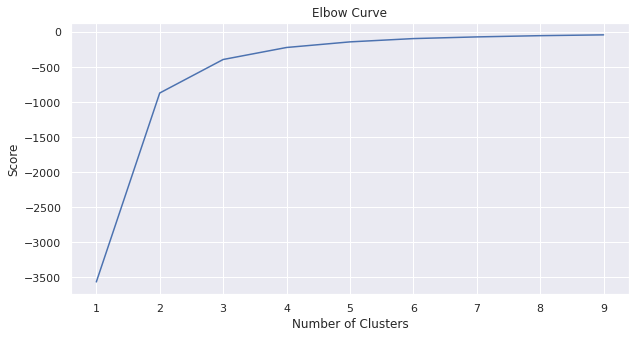

In [48]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = uio[['pickup_latitude']]
X_axis = uio[['pickup_longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [49]:
kmeans = KMeans(n_clusters = num_clusters, init ='k-means++', max_iter=100, n_init=1, verbose=0, random_state=3425)
kmeans.fit(uio[['pickup_latitude', 'pickup_longitude']]) # Compute k-means clustering.
uio['cluster_pickup'] = kmeans.fit_predict(uio[['pickup_latitude', 'pickup_longitude']])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(uio[['pickup_latitude', 'pickup_longitude']]) # Labels of each point
uio.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,log_trip_duration,trip_duration_in_minutes,diff_datetime_minutes,pickup_month,pickup_year,pickup_day,pickup_hour,pickup_minute,pickup_day_of_week,cluster_pickup
1,2,Guadalajara Easy Taxi,2016-09-17 09:59:54,2016-09-17 10:06:23,0.327804,0.391950,-103.366600,20.686971,N,389,...,5.966147,6.483333,6.483333,9,2016,17,9,59,5,1
2,3,Monterrey,2016-09-17 10:06:52,2016-09-17 10:09:40,0.140910,0.563280,-100.165737,25.619387,N,168,...,5.129899,2.800000,2.800000,9,2016,17,10,6,5,1
3,4,Monterrey,2016-09-17 09:45:56,2016-09-17 10:13:34,0.207565,0.590416,-100.491721,25.676294,N,1659,...,7.414573,27.650000,27.633333,9,2016,17,9,45,5,1
4,5,Monterrey,2016-09-17 10:12:00,2016-09-17 10:16:31,0.128881,0.580419,-100.104166,25.643862,N,272,...,5.609472,4.533333,4.516667,9,2016,17,10,12,5,1
8,9,Monterrey,2016-09-17 09:48:30,2016-09-17 10:33:27,0.223600,0.626796,-100.495666,25.687190,N,2698,...,7.900637,44.966667,44.950000,9,2016,17,9,48,5,1
9,10,Guadalajara Easy Taxi,2016-09-17 10:28:23,2016-09-17 10:35:03,0.327517,0.390198,-103.359451,20.669558,N,401,...,5.996452,6.683333,6.666667,9,2016,17,10,28,5,1
10,11,Monterrey,2016-09-17 10:27:41,2016-09-17 10:36:13,0.129025,0.579781,-100.081929,25.643473,N,512,...,6.240276,8.533333,8.533333,9,2016,17,10,27,5,1
11,12,Monterrey,2016-09-17 10:33:15,2016-09-17 10:42:40,0.215668,0.616358,-100.413199,25.686818,N,566,...,6.340359,9.433333,9.416667,9,2016,17,10,33,5,1
12,13,Monterrey,2016-09-17 10:24:21,2016-09-17 10:50:06,0.138116,0.635374,-100.094773,25.701190,N,1546,...,7.344073,25.766667,25.750000,9,2016,17,10,24,5,1
13,14,Monterrey,2016-09-17 10:33:30,2016-09-17 10:54:22,0.223734,0.626167,-100.452447,25.703845,N,1252,...,7.133296,20.866667,20.866667,9,2016,17,10,33,5,1


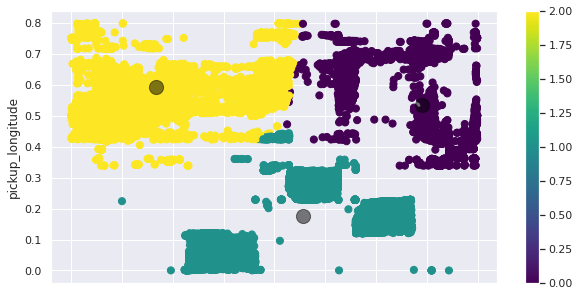

In [50]:
uio.plot.scatter(x = 'pickup_latitude', y = 'pickup_longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


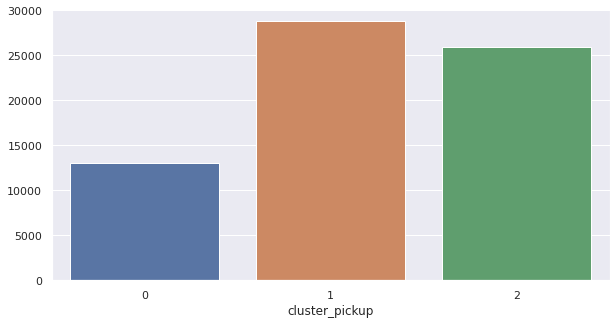

In [51]:
x = uio.groupby(['cluster_pickup'])['id'].count()
sns.barplot(x.index, x.values)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


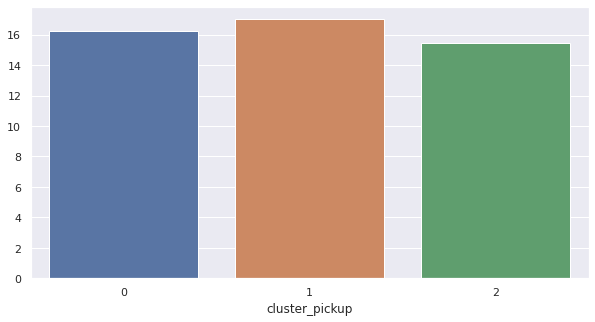

In [52]:
x = uio.groupby(['cluster_pickup'])['trip_duration_in_minutes'].mean()
sns.barplot(x.index, x.values)
plt.show()

Dropoff

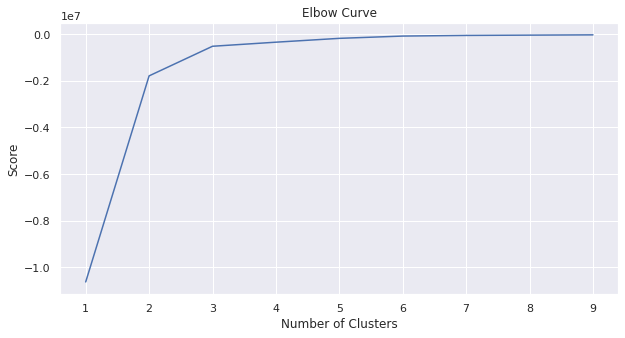

In [53]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = uio[['dropoff_latitude']]
X_axis = uio[['dropoff_longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [54]:
kmeans = KMeans(n_clusters = num_clusters, init ='k-means++', max_iter=100, n_init=1, verbose=0, random_state=3425)
kmeans.fit(uio[['dropoff_latitude', 'dropoff_longitude']]) # Compute k-means clustering.
uio['cluster_dropoff'] = kmeans.fit_predict(uio[['dropoff_latitude', 'dropoff_longitude']])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(uio[['dropoff_latitude', 'dropoff_longitude']]) # Labels of each point
uio.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,trip_duration_in_minutes,diff_datetime_minutes,pickup_month,pickup_year,pickup_day,pickup_hour,pickup_minute,pickup_day_of_week,cluster_pickup,cluster_dropoff
1,2,Guadalajara Easy Taxi,2016-09-17 09:59:54,2016-09-17 10:06:23,0.327804,0.391950,-103.366600,20.686971,N,389,...,6.483333,6.483333,9,2016,17,9,59,5,1,1
2,3,Monterrey,2016-09-17 10:06:52,2016-09-17 10:09:40,0.140910,0.563280,-100.165737,25.619387,N,168,...,2.800000,2.800000,9,2016,17,10,6,5,1,1
3,4,Monterrey,2016-09-17 09:45:56,2016-09-17 10:13:34,0.207565,0.590416,-100.491721,25.676294,N,1659,...,27.650000,27.633333,9,2016,17,9,45,5,1,1
4,5,Monterrey,2016-09-17 10:12:00,2016-09-17 10:16:31,0.128881,0.580419,-100.104166,25.643862,N,272,...,4.533333,4.516667,9,2016,17,10,12,5,1,1
8,9,Monterrey,2016-09-17 09:48:30,2016-09-17 10:33:27,0.223600,0.626796,-100.495666,25.687190,N,2698,...,44.966667,44.950000,9,2016,17,9,48,5,1,1
9,10,Guadalajara Easy Taxi,2016-09-17 10:28:23,2016-09-17 10:35:03,0.327517,0.390198,-103.359451,20.669558,N,401,...,6.683333,6.666667,9,2016,17,10,28,5,1,1
10,11,Monterrey,2016-09-17 10:27:41,2016-09-17 10:36:13,0.129025,0.579781,-100.081929,25.643473,N,512,...,8.533333,8.533333,9,2016,17,10,27,5,1,1
11,12,Monterrey,2016-09-17 10:33:15,2016-09-17 10:42:40,0.215668,0.616358,-100.413199,25.686818,N,566,...,9.433333,9.416667,9,2016,17,10,33,5,1,1
12,13,Monterrey,2016-09-17 10:24:21,2016-09-17 10:50:06,0.138116,0.635374,-100.094773,25.701190,N,1546,...,25.766667,25.750000,9,2016,17,10,24,5,1,1
13,14,Monterrey,2016-09-17 10:33:30,2016-09-17 10:54:22,0.223734,0.626167,-100.452447,25.703845,N,1252,...,20.866667,20.866667,9,2016,17,10,33,5,1,1


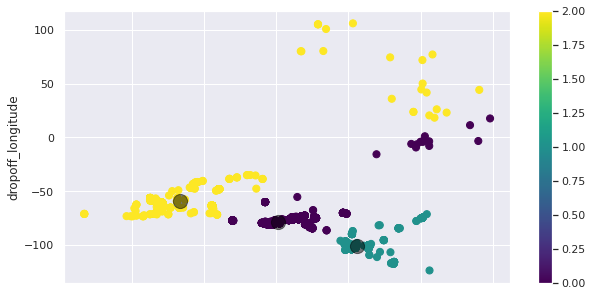

In [55]:
uio.plot.scatter(x = 'dropoff_latitude', y = 'dropoff_longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


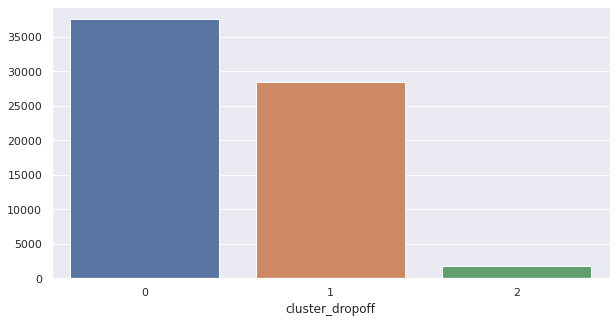

In [56]:
x = uio.groupby(['cluster_dropoff'])['id'].count()
sns.barplot(x.index, x.values)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


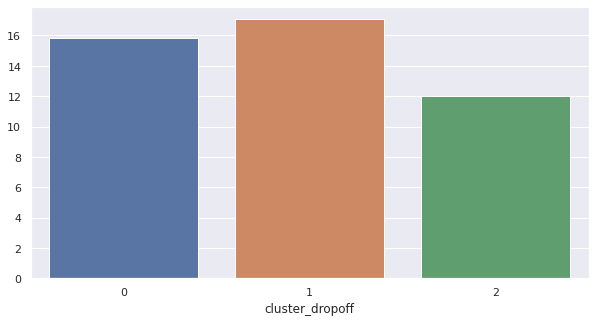

In [57]:
x = uio.groupby(['cluster_dropoff'])['trip_duration_in_minutes'].mean()
sns.barplot(x.index, x.values)
plt.show()

# **Convert VendorID ke Int**

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
le = LabelEncoder()

uio['vendor_code']= le.fit_transform(uio['vendor_id'])
uio.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,diff_datetime_minutes,pickup_month,pickup_year,pickup_day,pickup_hour,pickup_minute,pickup_day_of_week,cluster_pickup,cluster_dropoff,vendor_code
1,2,Guadalajara Easy Taxi,2016-09-17 09:59:54,2016-09-17 10:06:23,0.327804,0.391950,-103.366600,20.686971,N,389,...,6.483333,9,2016,17,9,59,5,1,1,41
2,3,Monterrey,2016-09-17 10:06:52,2016-09-17 10:09:40,0.140910,0.563280,-100.165737,25.619387,N,168,...,2.800000,9,2016,17,10,6,5,1,1,68
3,4,Monterrey,2016-09-17 09:45:56,2016-09-17 10:13:34,0.207565,0.590416,-100.491721,25.676294,N,1659,...,27.633333,9,2016,17,9,45,5,1,1,68
4,5,Monterrey,2016-09-17 10:12:00,2016-09-17 10:16:31,0.128881,0.580419,-100.104166,25.643862,N,272,...,4.516667,9,2016,17,10,12,5,1,1,68
8,9,Monterrey,2016-09-17 09:48:30,2016-09-17 10:33:27,0.223600,0.626796,-100.495666,25.687190,N,2698,...,44.950000,9,2016,17,9,48,5,1,1,68


In [60]:
print(uio.groupby(['vendor_id'])['id'].count().reset_index())

                vendor_id    id
0          Aguascalientes  8356
1    Aguascalientes UberX   197
2                  Ambato   129
3             Ant Ecuador   349
4                 Armenia     1
..                    ...   ...
124         Tijuana UberX    19
125          Toluca UberX     2
126               Uruguay   278
127      Valledupar UberX     2
128      Valparaiso UberX     1

[129 rows x 2 columns]


In [61]:
uio_distinct = uio[['vendor_id','vendor_code']]
uio_distinct.drop_duplicates()

,vendor_id,vendor_code
1,Guadalajara Easy Taxi,41
2,Monterrey,68
14,Aguascalientes,0
26,Cali,18
30,Manta,62
...,...,...
71648,Armenia,4
73320,Costa Rica Rural,25
74975,CÃ³rdoba Auto de Lujo,32
85833,Colonia,23


In [62]:
correlation_matrix = uio.corr()
print(correlation_matrix['trip_duration'])

id                          0.000257
pickup_longitude           -0.075235
pickup_latitude             0.037334
dropoff_longitude          -0.066677
dropoff_latitude            0.079298
trip_duration               1.000000
dist_meters                 0.662140
wait_sec                    0.010740
log_dist_meters             0.620776
dist_kilometers             0.662140
log_trip_duration           0.895693
trip_duration_in_minutes    1.000000
diff_datetime_minutes       0.130373
pickup_month               -0.003726
pickup_year                 0.008698
pickup_day                  0.003801
pickup_hour                -0.037539
pickup_minute              -0.013338
pickup_day_of_week         -0.008125
cluster_pickup             -0.037708
cluster_dropoff             0.019488
vendor_code                -0.096303
Name: trip_duration, dtype: float64


# **Cek Korelasi**

In [63]:
uio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67710 entries, 1 to 90285
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        67710 non-null  int64         
 1   vendor_id                 67710 non-null  object        
 2   pickup_datetime           67710 non-null  datetime64[ns]
 3   dropoff_datetime          67710 non-null  datetime64[ns]
 4   pickup_longitude          67710 non-null  float64       
 5   pickup_latitude           67710 non-null  float64       
 6   dropoff_longitude         67710 non-null  float64       
 7   dropoff_latitude          67710 non-null  float64       
 8   store_and_fwd_flag        67710 non-null  object        
 9   trip_duration             67710 non-null  int64         
 10  dist_meters               67710 non-null  int64         
 11  wait_sec                  67710 non-null  int64         
 12  log_dist_meters   

In [64]:
correlation_matrix = uio.corr()
print(correlation_matrix['trip_duration'])

id                          0.000257
pickup_longitude           -0.075235
pickup_latitude             0.037334
dropoff_longitude          -0.066677
dropoff_latitude            0.079298
trip_duration               1.000000
dist_meters                 0.662140
wait_sec                    0.010740
log_dist_meters             0.620776
dist_kilometers             0.662140
log_trip_duration           0.895693
trip_duration_in_minutes    1.000000
diff_datetime_minutes       0.130373
pickup_month               -0.003726
pickup_year                 0.008698
pickup_day                  0.003801
pickup_hour                -0.037539
pickup_minute              -0.013338
pickup_day_of_week         -0.008125
cluster_pickup             -0.037708
cluster_dropoff             0.019488
vendor_code                -0.096303
Name: trip_duration, dtype: float64


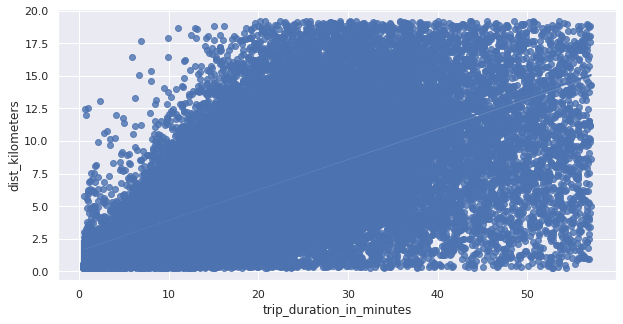

In [65]:
sns.regplot(x=uio["trip_duration_in_minutes"], y=uio["dist_kilometers"])

# **Split Data**

In [66]:
uio.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,diff_datetime_minutes,pickup_month,pickup_year,pickup_day,pickup_hour,pickup_minute,pickup_day_of_week,cluster_pickup,cluster_dropoff,vendor_code
1,2,Guadalajara Easy Taxi,2016-09-17 09:59:54,2016-09-17 10:06:23,0.327804,0.391950,-103.366600,20.686971,N,389,...,6.483333,9,2016,17,9,59,5,1,1,41
2,3,Monterrey,2016-09-17 10:06:52,2016-09-17 10:09:40,0.140910,0.563280,-100.165737,25.619387,N,168,...,2.800000,9,2016,17,10,6,5,1,1,68
3,4,Monterrey,2016-09-17 09:45:56,2016-09-17 10:13:34,0.207565,0.590416,-100.491721,25.676294,N,1659,...,27.633333,9,2016,17,9,45,5,1,1,68
4,5,Monterrey,2016-09-17 10:12:00,2016-09-17 10:16:31,0.128881,0.580419,-100.104166,25.643862,N,272,...,4.516667,9,2016,17,10,12,5,1,1,68
8,9,Monterrey,2016-09-17 09:48:30,2016-09-17 10:33:27,0.223600,0.626796,-100.495666,25.687190,N,2698,...,44.950000,9,2016,17,9,48,5,1,1,68


Menentukan feature dan label

In [67]:
uio_fix = uio[['trip_duration_in_minutes', 'dist_kilometers']]

In [68]:
uio_fix

,trip_duration_in_minutes,dist_kilometers
1,6.483333,2.962
2,2.800000,0.951
3,27.650000,11.082
4,4.533333,2.021
8,44.966667,4.770
...,...,...
90273,16.850000,12.569
90276,0.666667,0.313
90277,10.616667,7.591
90279,9.783333,3.661


Pembagian data training & testing

In [69]:
train_dataset = uio_fix.sample(frac=0.8, random_state=0)
test_dataset = uio_fix.drop(train_dataset.index)

In [70]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
trip_duration_in_minutes,54168.0,16.245210,11.188193,0.500,8.066667,13.366667,21.583333,57.066667
dist_kilometers,54168.0,5.466633,3.965712,0.251,2.488000,4.420000,7.520000,19.217000


In [71]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('trip_duration_in_minutes')
test_labels = test_features.pop('trip_duration_in_minutes')

In [72]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
trip_duration_in_minutes,16.245210,11.188193
dist_kilometers,5.466633,3.965712


In [73]:
X_train, X_test, y_train, y_test = train_test_split(train_features, train_labels, test_size = 0.2, random_state = 5)

In [74]:
print(y_train.min())
print(y_train.max())
print(y_test.min())
print(y_test.max())

print(X_train[['dist_kilometers']].min())
print(X_train[['dist_kilometers']].max())
print(X_test[['dist_kilometers']].min())
print(X_test[['dist_kilometers']].max())

0.5
57.06666666666667
0.5
56.85
dist_kilometers    0.251
dtype: float64
dist_kilometers    19.211
dtype: float64
dist_kilometers    0.251
dtype: float64
dist_kilometers    19.217
dtype: float64


# **Normalisasi Data**

In [75]:
feature_scaler = StandardScaler()
label_scaler = StandardScaler()

# Fit and Transform both training and testing data
X_train = feature_scaler.fit_transform(X_train.values)
X_test = feature_scaler.fit_transform(X_test.values)
y_train = label_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = label_scaler.fit_transform(y_test.values.reshape(-1, 1))

# **Callback**

In [76]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<=0.45 and  logs.get('loss')<=0.5):
      print("\nScore MAE reached 0.45 so cancelling training!")
      self.model.stop_training = True
callback = myCallback()

# **Regression**

In [77]:
model = Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile( loss = 'mean_absolute_error',
              optimizer = tf.keras.optimizers.Adam(0.001))
history = model.fit(epochs=25, x=X_train, y=y_train,batch_size = 100,
          validation_split=0.2#,
          #callbacks = [callback]
          )

Epoch 1/25
347/347 [==============================] - 1s 2ms/step - loss: 0.4990 - val_loss: 0.4846
Epoch 2/25
347/347 [==============================] - 1s 2ms/step - loss: 0.4919 - val_loss: 0.4853
Epoch 3/25
347/347 [==============================] - 1s 2ms/step - loss: 0.4916 - val_loss: 0.4852
Epoch 4/25
347/347 [==============================] - 1s 2ms/step - loss: 0.4918 - val_loss: 0.4852
Epoch 5/25
347/347 [==============================] - 1s 2ms/step - loss: 0.4916 - val_loss: 0.4854
Epoch 6/25
347/347 [==============================] - 1s 2ms/step - loss: 0.4917 - val_loss: 0.4867
Epoch 7/25
347/347 [==============================] - 1s 2ms/step - loss: 0.4918 - val_loss: 0.4854
Epoch 8/25
347/347 [==============================] - 1s 2ms/step - loss: 0.4918 - val_loss: 0.4865
Epoch 9/25
347/347 [==============================] - 1s 2ms/step - loss: 0.4917 - val_loss: 0.4855
Epoch 10/25
347/347 [==============================] - 1s 2ms/step - loss: 0.4916 - val_loss: 0.4860

In [78]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                128       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


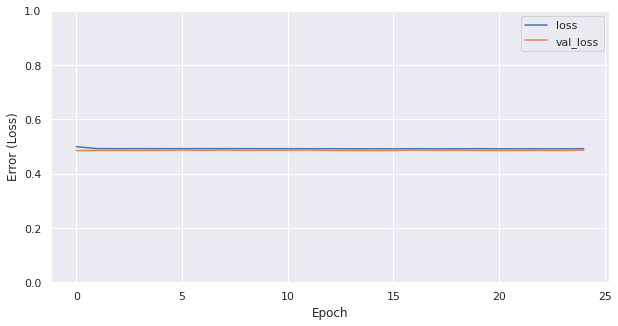

In [79]:
#Plot lost history
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0,1])
    plt.xlabel('Epoch')
    plt.ylabel('Error (Loss)')
    plt.legend()
    plt.grid(True)

plot_loss(history)

# **Testing Model**

In [80]:
test_predictions = model.predict(X_test).flatten()

In [81]:
test_predictions = label_scaler.inverse_transform(test_predictions.reshape(-1, 1))
print(test_predictions)

[[12.320852 ]
 [ 3.4008741]
 [ 2.7509794]
 ...
 [18.80172  ]
 [10.564904 ]
 [ 4.0591936]]


In [82]:
y_test = label_scaler.inverse_transform(y_test.reshape(-1, 1))
print(y_test)

[[15.76666667]
 [ 2.1       ]
 [ 5.91666667]
 ...
 [18.15      ]
 [12.8       ]
 [ 2.3       ]]


In [83]:
print(test_predictions.min())
print(test_predictions.max())
print(y_test.min())
print(y_test.max())

1.4861563
37.07387
0.5000000000000018
56.849999999999994


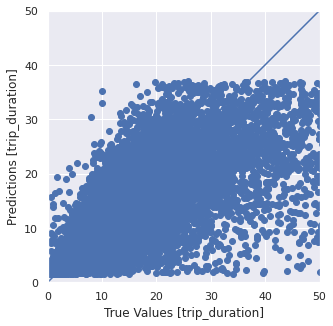

In [84]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [trip_duration]')
plt.ylabel('Predictions [trip_duration]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

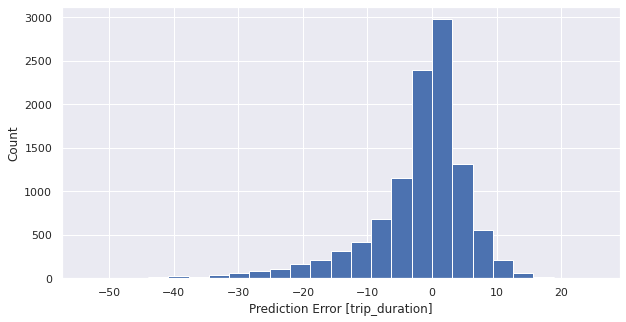

In [85]:
sns.set(rc={'figure.figsize':(10,5)})
error = test_predictions - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [trip_duration]')
_ = plt.ylabel('Count')